In [13]:
import numpy as np
import pandas as pd
import random

In [14]:
def conta(fluxo_calor,taxa_transferencia,area,condutividade,dt_dx):
    if area == 0:
        try:
            area = taxa_transferencia/fluxo_calor
        except:
            raise Exception("Erro: divisão por zero")
        return area
    elif taxa_transferencia == 0:
        taxa_transferencia = fluxo_calor * area
        return taxa_transferencia
    elif fluxo_calor == 0:
        try:
            fluxo_calor = taxa_transferencia/area
        except ZeroDivisionError:
            fluxo_calor = -1 * condutividade * dt_dx
        return fluxo_calor
    elif condutividade == 0:
        condutividade = -1*(fluxo_calor/dt_dx)
        return condutividade
    elif dt_dx == 0:
        dt_dx = -1*(fluxo_calor/condutividade)
        return dt_dx

In [15]:
def geracao0(arr):
    area = random.SystemRandom().uniform(0.1, 10)

    condutividade = random.SystemRandom().uniform(0.01,200)#Condutividade térmica em W/mK

    taxa_transferencia = random.SystemRandom().uniform(1,100) #Taxa de transferência de calor em W/m²

    fluxo_calor = conta(0,taxa_transferencia,area,condutividade,0) #Fluxo de calor em W/m²

    dt_dx = conta(fluxo_calor,taxa_transferencia,area,condutividade,0) #Variação de temperatura em K/m

    arr = np.append(arr,[[fluxo_calor,taxa_transferencia,area,condutividade,dt_dx]],axis=0)

    return arr

In [16]:
def geracao1(arr):
    condutividade = random.SystemRandom().uniform(0.01,200)#Condutividade térmica em W/mK

    taxa_transferencia = random.SystemRandom().uniform(1,100) #Taxa de transferência de calor em W/m²

    fluxo_calor = random.SystemRandom().uniform(1,100) #Fluxo de calor em W/m²

    area = conta(fluxo_calor,taxa_transferencia,0,condutividade,0) #Área em m²

    dt_dx = conta(fluxo_calor,taxa_transferencia,area,condutividade,0) #Variação de temperatura em K/m

    arr = np.append(arr,[[fluxo_calor,taxa_transferencia,area,condutividade,dt_dx]],axis=0)

    return arr

In [17]:
def geracao2(arr):
    #dt dx vai ser um valor negativo entre 0 e 10
    dt_dx = random.SystemRandom().uniform(-10,0) #Variação de temperatura em K/m

    area = random.SystemRandom().uniform(0.1, 10)

    fluxo_calor = random.SystemRandom().uniform(1,100) #Fluxo de calor em W/m²

    taxa_transferencia = conta(fluxo_calor,0,area,0,dt_dx) #Taxa de transferência de calor em W/m²

    condutividade = conta(fluxo_calor,taxa_transferencia,area,0,dt_dx) #Condutividade térmica em W/mK

    arr = np.append(arr,[[fluxo_calor,taxa_transferencia,area,condutividade,dt_dx]],axis=0)

    return arr

In [18]:
def geracao3(arr):
    #calcular a área e o fluxo de calor, os outros vão ser gerados aleatoriamente
    taxa_transferencia = random.SystemRandom().uniform(1,100) #Taxa de transferência de calor em W/m²

    condutividade = random.SystemRandom().uniform(0.01,200)#Condutividade térmica em W/mK

    dt_dx = random.SystemRandom().uniform(-10,0) #Variação de temperatura em K/m

    fluxo_calor = -1 * condutividade * dt_dx

    area = conta(fluxo_calor,taxa_transferencia,0,condutividade,dt_dx) 
    
    arr = np.append(arr,[[fluxo_calor,taxa_transferencia,area,condutividade,dt_dx]],axis=0)
    
    return arr

Vamos acabar gerando mais dados para uma tabela somente com dados de testes, apesar de termos reservados 20% da geracao.csv para isso

In [19]:
arr = np.array([[0,0,0,0,0]])

for i in range(5000):
    n = random.SystemRandom().randint(0,3)
    if n == 0:
        arr = geracao0(arr)
    elif n == 1:
        arr = geracao1(arr)
    elif n == 2:
        arr = geracao2(arr)
    elif n == 3:
        arr = geracao3(arr)

df = pd.DataFrame(arr,columns=['flx_calor','tx_transf','area','condutividade','dtdx'])
df = df.drop(0)
df.to_csv('teste.csv')

In [20]:
qtd_flx_incorretos = 0
qtd_dt_dx_incorretos = 0
qtd_area_incorretos = 0
qtd_cond_incorretos = 0
qtd_taxa_incorretos = 0
#no loop abaixo estamos verifcando se os valores gerados estão corretos
#estamos usando a função round pois temos um erro minimo, então sem a função round o python não consideraria os valores iguais
#apesar de terem uma diferença de 1x10^-8

for i in range(len(df)):
    flx = df.iloc[i]['flx_calor']
    dt_dx = df.iloc[i]['dtdx']
    area = df.iloc[i]['area']
    cond = df.iloc[i]['condutividade']
    taxa = df.iloc[i]['tx_transf']
    if round(flx,3) != round(conta(0,taxa,area,cond,dt_dx),3):
        qtd_flx_incorretos += 1
    if round(dt_dx,3) != round(conta(flx,taxa,area,cond,0),3):
        qtd_dt_dx_incorretos += 1
    if round(area,3) != round(conta(flx,taxa,0,cond,dt_dx),3):
        qtd_area_incorretos += 1
    if round(cond,3) != round(conta(flx,taxa,area,0,dt_dx),3):
        qtd_cond_incorretos += 1
    if round(taxa,3) != round(conta(flx,0,area,cond,dt_dx),3):
        qtd_taxa_incorretos += 1

print('Quantidade de fluxos incorretos: ',qtd_flx_incorretos)
print('Quantidade de dt/dx incorretos: ',qtd_dt_dx_incorretos)
print('Quantidade de áreas incorretas: ',qtd_area_incorretos)
print('Quantidade de condutividades incorretas: ',qtd_cond_incorretos)
print('Quantidade de taxas incorretas: ',qtd_taxa_incorretos)


Quantidade de fluxos incorretos:  0
Quantidade de dt/dx incorretos:  0
Quantidade de áreas incorretas:  0
Quantidade de condutividades incorretas:  0
Quantidade de taxas incorretas:  0


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

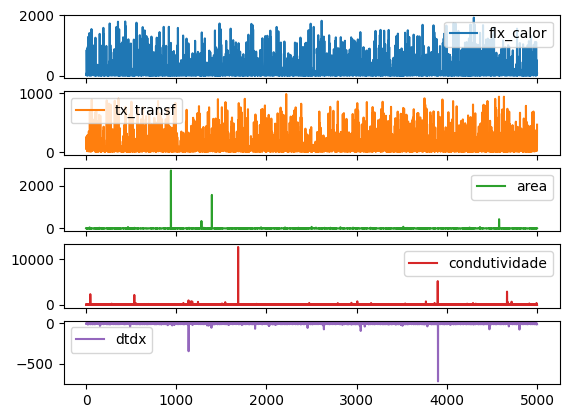

In [21]:
df.plot(subplots=True)

In [22]:
df = df[df.iloc[:,4] > -30]
df = df[df.iloc[:,3] < 300]
df = df[df.iloc[:,2] < 30]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

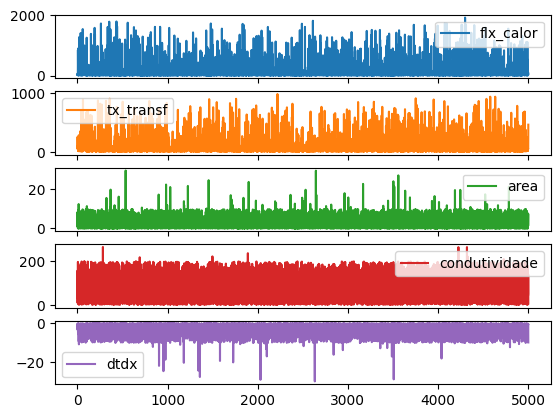

In [23]:
df.plot(subplots=True)